In [1]:
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

sns.set()

The alpha-beta filter can be considered as a modification of the Kalman filter. Thus, this filter, like the Kalman filter, only works if the noises follow a normal distribution. However, in reality, noises often correspond to the Cauchy distribution, which is similar to the Gaussian distribution but has much heavier tails.

## Normal Distribution
The normal distribution (Gaussian distribution) has the following probability density function: \
$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \cdot e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$
<div style="text-align: left;">
$x$ - random variable <br>
$\mu$ - mean (average) <br>
$\sigma$ - standard deviation <br>
</div>

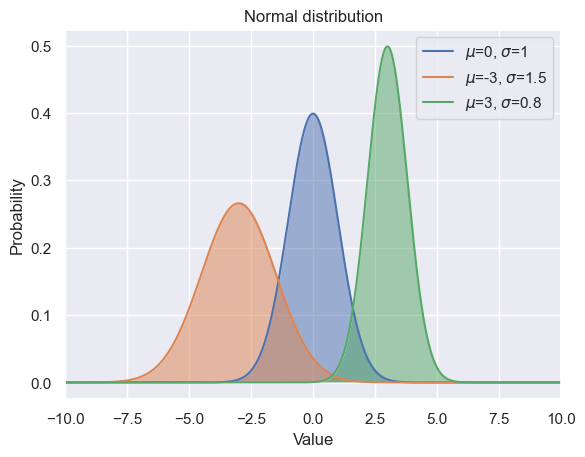

In [14]:
plt.figure()
plt.title('Normal distribution')
plt.xlabel('Value')
plt.ylabel('Probability')

size = 100000
left = -10
right = +10
plt.xlim(left, right)

mu = 0
sigma = 1
x = np.linspace(left, right, size)
y = (1/(sigma * np.sqrt(2*np.pi))) * np.exp(-(x-mu)**2 / (2*sigma**2))
label = '$\mu$=' + str(mu) + ', $\sigma$=' + str(sigma)
plt.plot(x, y, label=label)
plt.fill_between(x, 0, y, alpha=0.5)

mu = -3
sigma = 1.5
x = np.linspace(left, right, size)
y = (1/(sigma * np.sqrt(2*np.pi))) * np.exp(-(x-mu)**2 / (2*sigma**2))
label = '$\mu$=' + str(mu) + ', $\sigma$=' + str(sigma)
plt.plot(x, y, label=label)
plt.fill_between(x, 0, y, alpha=0.5)

mu = 3
sigma = 0.8
x = np.linspace(left, right, size)
y = (1/(sigma * np.sqrt(2*np.pi))) * np.exp(-(x-mu)**2 / (2*sigma**2))
label = '$\mu$=' + str(mu) + ', $\sigma$=' + str(sigma)
plt.plot(x, y, label=label)
plt.fill_between(x, 0, y, alpha=0.5)

plt.legend()
plt.show()

## Cauchy distribution
The Cauchy distribution has the following probability density function:
$$
f(x) = \frac{1}{\pi \gamma \left[ 1 + \left( \frac{x - x_0}{\gamma} \right)^2 \right]}
$$
where:
$x$ - random variable </br>
$x_0$ - median (position of the distribution peak) </br>
$\gamma$ - scale parameter (width of the distribution) </br>


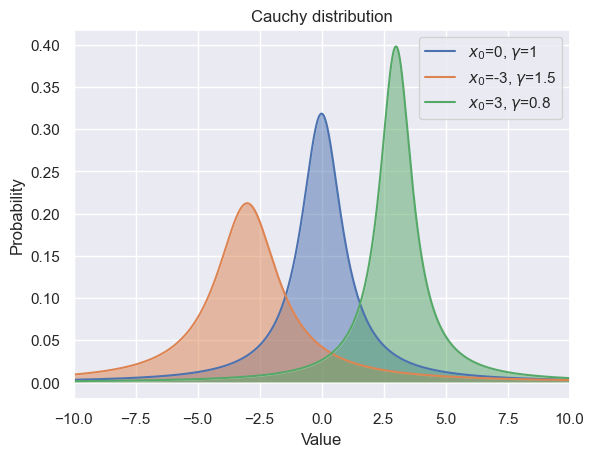

In [15]:
plt.figure()
plt.title('Cauchy distribution')
plt.xlabel('Value')
plt.ylabel('Probability')

size = 100000
left = -10
right = +10
plt.xlim(left, right)

x0 = 0
gamma = 1
x = np.linspace(left, right, size)
y = (1/(np.pi * gamma * (1 + ((x - x0)/gamma)**2)))
label = '$x_0$=' + str(x0) + ', $\gamma$=' + str(gamma)
plt.plot(x, y, label=label)
plt.fill_between(x, 0, y, alpha=0.5)

x0 = -3
gamma = 1.5
x = np.linspace(left, right, size)
y = (1/(np.pi * gamma * (1 + ((x - x0)/gamma)**2)))
label = '$x_0$=' + str(x0) + ', $\gamma$=' + str(gamma)
plt.plot(x, y, label=label)
plt.fill_between(x, 0, y, alpha=0.5)

x0 = 3
gamma = 0.8
x = np.linspace(left, right, size)
y = (1/(np.pi * gamma * (1 + ((x - x0)/gamma)**2)))
label = '$x_0$=' + str(x0) + ', $\gamma$=' + str(gamma)
plt.plot(x, y, label=label)
plt.fill_between(x, 0, y, alpha=0.5)

plt.legend()
plt.show()

## Сравнение работы фильтра

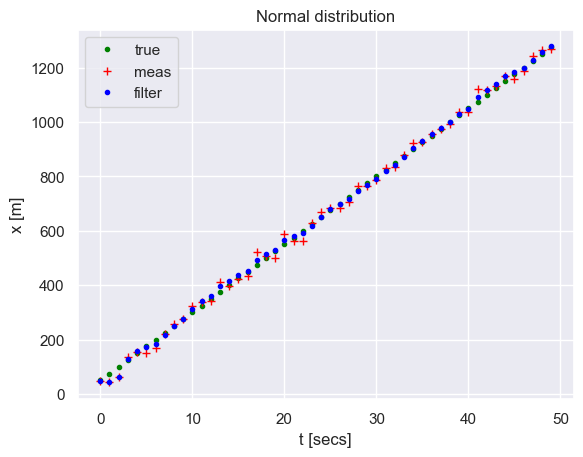

In [11]:
def filter_step(k, k_max, meas, dt, x_prev, V_prev):
    if (x_prev is None) and (V_prev is None): # first step of initialization
        return meas, None
    
    if V_prev is None:                        # second step of initialization
        return meas, (meas - x_prev) / dt

    if k > k_max:
        k = k_max
    
    a = 2.*(2. * k - 1.) / (k * (k + 1.))
    b = 6. / (k * (k + 1.))

    x_pred = x_prev + (V_prev*dt)
    V_pred = V_prev
    
    x = x_pred + (a * (meas - x_pred))
    V = V_pred + ((b / dt) * (meas - x_pred))
    
    return x, V


number_steps = 50
x0 = 50.
V0 = 25.
dt = 1.
true_arr  = []
mu = 0.
std = 20.
gaussian_noise = np.random.normal(mu, std, number_steps)

for i in range(number_steps):
    t = i * dt
    true = x0 + (V0*t)    
    true_arr.append(true)

meas_arr = true_arr + gaussian_noise

x_arr = []
V_arr = []
x_prev = None
V_prev = None
for i in range(number_steps):
    x, V = filter_step(i, 10, meas_arr[i], dt, x_prev, V_prev)
    
    x_arr.append(x)
    V_arr.append(V)
    
    x_prev = x
    V_prev = V

plt.figure()
plt.title('Normal distribution')
plt.xlabel('t [secs]')
plt.ylabel('x [m]')
plt.plot(true_arr,  marker='.', linestyle='none', color='green', label='true'  ) 
plt.plot(meas_arr, marker='+', linestyle='none', color='red',   label='meas'  ) 
plt.plot(x_arr,     marker='.', linestyle='none', color='blue',  label='filter')
plt.legend(loc='upper left')
plt.show()

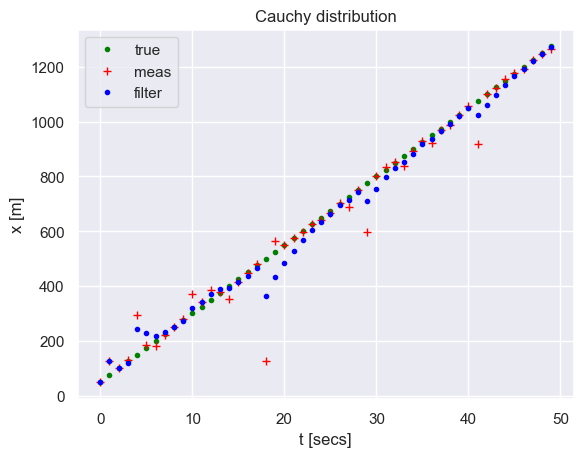

In [12]:
x0 = 0
gamma = 5.
cauchy_noise = sp.stats.cauchy.rvs(x0, gamma, number_steps)
meas_arr = true_arr + cauchy_noise

x_arr = []
V_arr = []
x_prev = None
V_prev = None
for i in range(number_steps):
    x, V = filter_step(i, 10, meas_arr[i], dt, x_prev, V_prev)
    
    x_arr.append(x)
    V_arr.append(V)
    
    x_prev = x
    V_prev = V
    
plt.figure()
plt.title('Cauchy distribution')
plt.xlabel('t [secs]')
plt.ylabel('x [m]')
plt.plot(true_arr,  marker='.', linestyle='none', color='green', label='true'  ) 
plt.plot(meas_arr, marker='+', linestyle='none', color='red',   label='meas'  ) 
plt.plot(x_arr,     marker='.', linestyle='none', color='blue',  label='filter')
plt.legend(loc='upper left')
plt.show()